In [25]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_pickle("C:/Users/User/1Ironhack/DATA/Visualising_Real_Time_Data_Project/Data_Cleaning_Step_3/airbnb_listings_countries.pkl")

In [24]:
df.head()

,Listing ID,Name,Host ID,Host Name,Host Response Rate,Host Is Superhost,Host total listings count,Country,latitude,longitude,...,Last Review Date,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month,Amenity_Count
0,5534229,A 2 Passi da San Pietro,28697142,Veronica,100.0,False,5.0,Italy,41.895878,12.454430,...,2015-08-29,90.0,9.0,10.0,8.0,8.0,9.0,9.0,0.08,11
1,5903406,cosy small apartment,1853799,Veronika,88.0,False,2.0,Austria,48.246033,16.340743,...,2017-09-09,87.0,9.0,10.0,10.0,10.0,10.0,8.0,0.27,12
2,5203533,Rummelig lejl i hjertet af KBH,24801534,Marianne,100.0,False,1.0,Denmark,55.681579,12.562770,...,2016-07-26,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.28,8
3,8858475,Modern; spacious and warm; with its own balcony,3000397,Lasse,100.0,True,1.0,Denmark,55.708413,12.596737,...,2017-05-07,100.0,10.0,10.0,10.0,10.0,9.0,10.0,0.79,23
4,4215511,Nice room; Bohemian Cph; N�rrebro,126020,Lea,100.0,True,2.0,Denmark,55.687506,12.558365,...,2017-05-08,94.0,10.0,10.0,9.0,10.0,10.0,10.0,1.40,10


In [38]:
df.dtypes

Listing ID                             object
Name                                   object
Host ID                                object
Host Name                              object
Host Response Rate                    float64
Host Is Superhost                        bool
Host total listings count             float64
Country                                object
latitude                              float64
longitude                             float64
Property type                          object
Room type                              object
Accommodates                            int64
Bathrooms                             float64
Bedrooms                              float64
Amenities                              object
Price                                 float64
Minimum nights                          int64
Maximum nights                          int64
Availability 365                        int64
Calendar last scraped          datetime64[ns]
Number of reviews                 

In [56]:
df = df.rename(columns={"Review Scores Rating": "Review_Scores_Rating"})

In [59]:
df['Amenity_Count'].describe()

count    401765.000000
mean         16.066586
std           6.272326
min           1.000000
25%          12.000000
50%          15.000000
75%          19.000000
max          87.000000
Name: Amenity_Count, dtype: float64

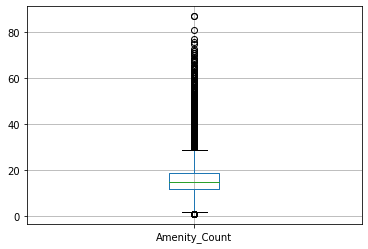

In [62]:
df.boxplot(column='Amenity_Count');

In [63]:
df['Amenity_Count'].mode()

0    14
dtype: int64

The average number of amenities for the listings reviewed is 16.
The median is 15 amenities
The most common number of amenities (mode) is 14
The maximum number of amenities is 87
Only 25% of the listings have more than 19 amenities though.

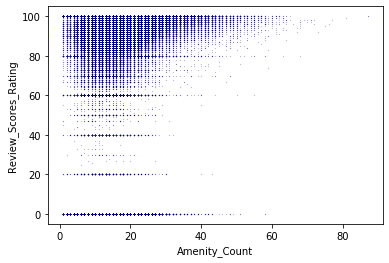

In [64]:
df.plot.scatter(x='Amenity_Count',
     y='Review_Scores_Rating',
     c='DarkBlue',
        s=0.01);